In [14]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import time

from Consensus import *
from Flocking import *
from graph_utils import *
from dynamics import *

First create a Watts-Strogatz network with 100 nodes.

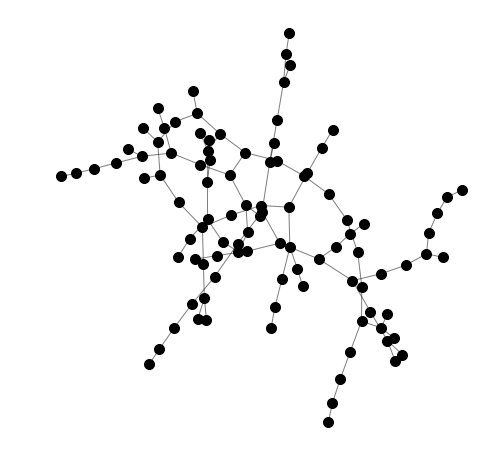

In [21]:
N = 100
av_degree = 6
m = int(av_degree/2)

GWS = nx.watts_strogatz_graph(N, m,0.5)

# plot the network
pos = nx.fruchterman_reingold_layout(GWS);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(GWS, pos, node_size=100, node_color="black");
nx.draw_networkx_edges(GWS, pos, alpha=0.500);
plt.show();

## Consensus

A *Consensus_Simulation* object may be constructed with fixed 
graph topology inherent to it's dynamics function.

In [31]:
CS = Consensus_Simulation(GWS,
                          distributed,    
                          [nx.laplacian_matrix(GWS).todense()])

The disagreement and agreement are calculated by by

In [32]:
print("Disagreement: ", CS.disagreement())
print("Agreement: ", CS.agreement())

Disagreement:  46222.5
Agreement:  False


The simulation is run and results plotted as follows

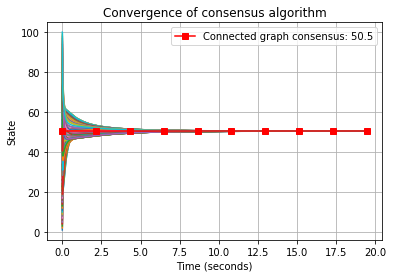

In [33]:
CS.run_sim()
CS.plot()

# Flocking

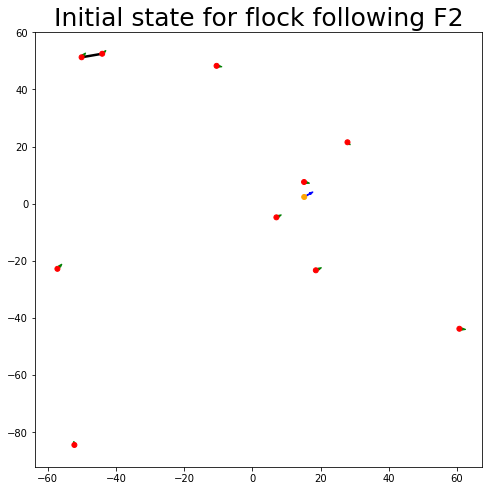

In [7]:
# could also leave Q and P for a default random initialisation
N=10
Q = np.sqrt(2500)*np.random.randn(N,2)
P = (5)*np.random.rand(N,2)-1

FS = Flock(number_of_agents=N,
           initial_position=Q,
           initial_velocity=P,
           inter_agent_distance=7,
           gamma_agent=True)

p = FS.plot(arrow_width=0.25)
plt.title("Initial state for flock following F2", fontsize=25)

In [8]:
# run the sim for 10 seconds and save all the data
FS.run_sim(T=10, save_data=True)

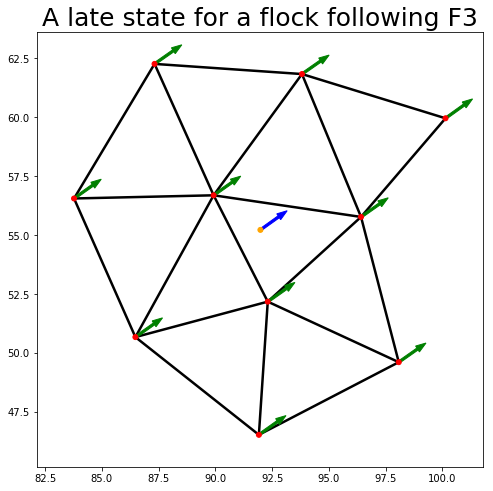

In [9]:
# plot the final state
q=FS.plot(arrow_width=0.1);
plt.title("A late state for a flock following F3", fontsize=25)